# Matching is as Easy as Matrix Inversion (1987)
#  Mulmaney, Vazirani, Vazirani

Paper Link: [https://doi.org/10.1007/BF02579206](https://doi.org/10.1007/BF02579206)


**Summary:**

This paper presents a linear algebra-based method for finding Perfect Matching and Maximum Matchings in general graphs. It determines the cardinality of these matchings by finding the rank of the Tutte matrix. The paper also mentions a parallel algorithm to find perfect matchings, although it doesn't provide an explicit presentation of the algorithm.

One notable quote from the paper is: "Hence, by picking a substitution deterministically, and inverting AS, we obtain the perfect matching. Since matrix inversion is in NC² [Cs], the result follows." The paper acknowledges that, at the time it was written, an outstanding open problem in parallel computation was to provide a deterministic NC algorithm for matching.

The exact procedure for extracting the matching from the inverted A matrix in parallel either may not have been known at the time or is performed exactly as the sequential version, which could be problematic as G' is updated in each iteration.


In [1]:
import scipy

In [2]:
from networkx.algorithms import bipartite
import networkx as nx
#random_graph(n, m, p[, seed, directed])
n = 20
m = 20
p = 0.6
seed = 1
directed = False
G = bipartite.random_graph(n, m, p, seed, directed)
reference_matching = nx.max_weight_matching(G, maxcardinality=True)
assert (len(reference_matching)==n)
import scipy.sparse as sps
# Convert the graph to a SciPy sparse matrix
mat = nx.to_scipy_sparse_array(G,format="lil")
#mat.setdiag(1)
print(mat.shape)

(40, 40)


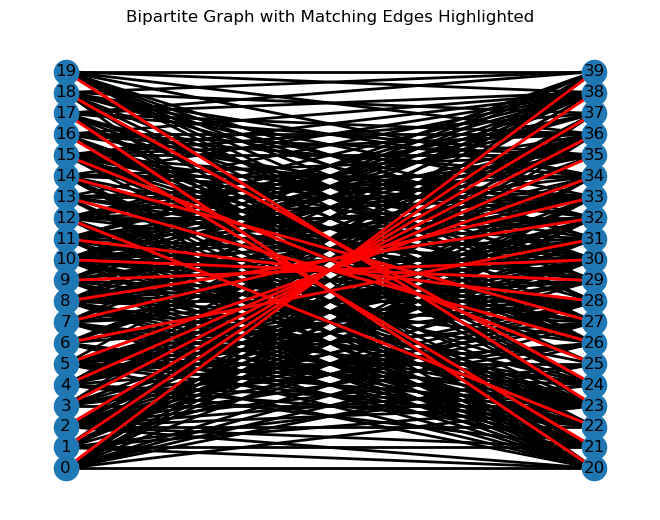

In [3]:
# Draw the graph with the perfect matching edges highlighted
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Get the nodes in each partition
partition1_nodes, partition2_nodes = bipartite.sets(G)
# Use bipartite_layout for bipartite graph visualization
pos = nx.bipartite_layout(G, partition1_nodes)

# Find the maximum cardinality matching
matching = nx.max_weight_matching(G, maxcardinality=True)

# Create a new graph with only the matching edges
matching_edges = [(u, v) for u, v in G.edges() if (u, v) in matching or (v, u) in matching]
matching_graph = nx.Graph()
matching_graph.add_edges_from(matching_edges)

# Create a list of edge colors, red for edges in the matching and black for others
edge_colors = ['r' if (u, v) in matching_edges or (v, u) in matching_edges else 'k' for u, v in G.edges()]

# Draw the bipartite graph with matching edges highlighted in red
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=2.0)
nx.draw(matching_graph, pos, with_labels=False, edge_color='r', width=2.0)

plt.title("Bipartite Graph with Matching Edges Highlighted")
plt.show()


$\textbf{DEFINITION.}$ Given a graph $G(V, E)$, let $D$ be its adjacency matrix, i.e.,

$d_{ij}= \begin{cases}
0, & \text{if } (u_i, u_j) \in E, \\
1, & \text{otherwise.}
\end{cases}$

Replace the 1's in this matrix by indeterminates in the following manner: if
$d_{ij} = d_{ji} = 1$, then replace these two entries by a unique indeterminate, say
$x_{ij}$, and its negative, i.e., $-x_{ij}$, so that the entries above the diagonal get a
positive sign. The resulting matrix, $A$, is called the Tutte matrix of $G$.

In [4]:
from scipy.sparse import triu, tril
# Set diagonal to 1 so matrix is invertible
# Extract upper triangle of symmetric sparse matrix
upper_triangle = triu(mat,format="csc", k=1)
lower_triangle = tril(mat,format="csc")
tutte=lower_triangle+(upper_triangle*-1)
print(tutte.shape)

(40, 40)


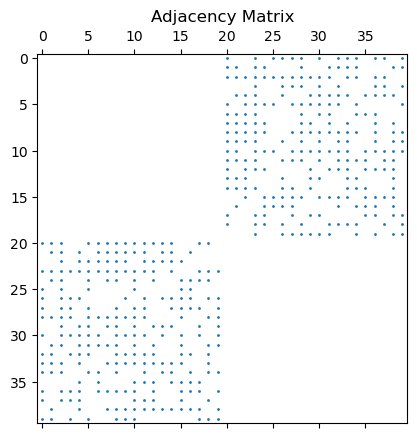

In [5]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.spy(tutte, aspect='equal', marker='.', markersize=2)
plt.title("Adjacency Matrix")
plt.show()

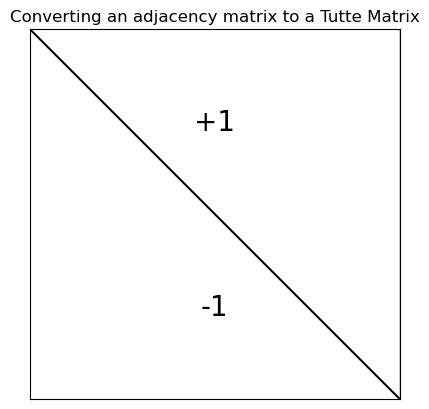

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_TutteTeachingTool():
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a square
    square = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(square)

    # Draw a line from the top-left corner to the bottom-right corner
    ax.plot([0, 1], [1, 0], 'k')

    # Add a big -1 to the top-right triangle
    triangle_vertices = np.array([[0, 1], [1, 1], [0, 0]])
    triangle = plt.Polygon(triangle_vertices, closed=True, fill=True, facecolor='w', edgecolor='none')
    ax.add_patch(triangle)
    ax.text(0.5, 0.75, '+1', fontsize=20, ha='center', va='center')

    # Add a big +1 to the bottom-left triangle
    triangle_vertices = np.array([[0, 1], [1, 0], [0, 0]])
    triangle = plt.Polygon(triangle_vertices, closed=True, fill=True, facecolor='w', edgecolor='none')
    ax.add_patch(triangle)
    ax.text(0.5, 0.25, '-1', fontsize=20, ha='center', va='center')

    # Set axis limits and aspect ratio
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')

    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Converting an adjacency matrix to a Tutte Matrix")
    # Show the plot
    plt.show()

# Call the method to create the plot
plot_TutteTeachingTool()


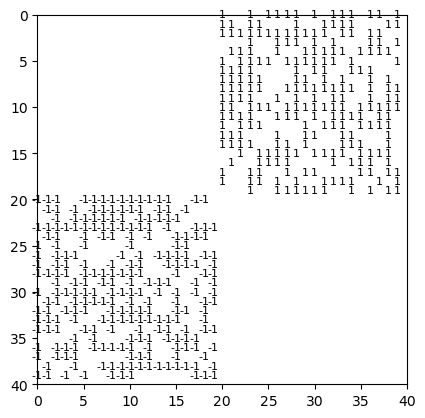

In [7]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt

def plot_randomized_adjacency_matrix(mat):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Get the non-zero elements and their positions
    non_zero_elements = mat.data
    row_indices, col_indices = mat.nonzero()

    # Plot numbers as markers with annotations
    for i in range(len(non_zero_elements)):
        ax.annotate(str(non_zero_elements[i]), (col_indices[i], row_indices[i]), color='black', fontsize=8, ha='center', va='center')

    # Set axis limits and aspect ratio
    ax.set_xlim(0, mat.shape[1])
    ax.set_ylim(0, mat.shape[0])
    ax.set_aspect('equal')

    # Invert the y-axis to have (0, 0) at the top left
    ax.invert_yaxis()

    # Show the plot
    plt.show()

# Call the method to create the plot
plot_randomized_adjacency_matrix(tutte)


$\textbf{THEOREM (Tutte)}$: Let $G$ be a graph, and let $A$ be its Tutte matrix. Then, if $\det(A) \neq 0$, there exists a perfect matching in $G$.

Aside: Tutte matrices are often singular, thus non-invertible.

Lovász [Lo] proposed the use of randomization for getting around this difficulty: substitute for the variables in $A$ randomly from a polynomially large set of integers; if $A$ was non-singular, the substituted matrix will be non-singular with very high probability.


$\textbf{DEFINITION.}$ Let $G$ be a graph having a perfect matching, $A$ be its Tutte matrix, and $p$ be any prime. A substitution $S$ for the variables in $A$ by elements of $\mathbb{Z}_p$ is a good substitution if $det(A^S) \neq 0 \, (\text{mod } p)$.


Could it happen that all these coefficients are divisible by a prime $p$ so that modulo $p$, the polynomial is the zero polynomial even though $\text{det}(A) \neq 0$ over the integers? In this case, the substituted matrix will be necessarily singular.

Find a prime $p > n^4$. Choose a random substitution $S$: a set of $x'_{ij}$ in $\mathbb{Z}_p$, i.e., independently, each $S(x_{ji})$ is equally likely to be any element of $\mathbb{Z}_p$. Denote by $A^S$ the result of replacing each $x_{ii}$ in $A^S$ by $S(x_{ij}$).

In this theorem, $\mathbb{Z}$ is the symbol for the class of integers.


(40, 40)


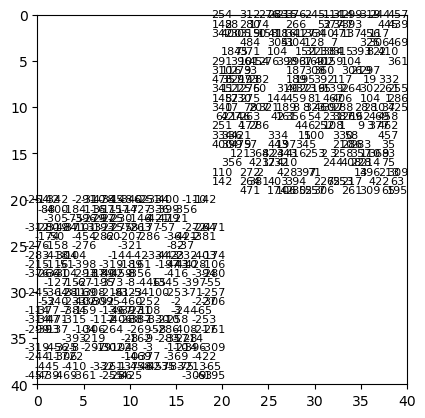

In [8]:
import time
import numpy as np
start_time = time.time()
# Set the data array in place to random integers between 0 and nnz
randomEdgeWeights = np.random.randint(1, 2*lower_triangle.nnz + 1, size=lower_triangle.nnz)
random_lower_triangle=lower_triangle.copy()
random_lower_triangle.data=randomEdgeWeights
random_tutte=random_lower_triangle+(random_lower_triangle.T*-1)
print(random_tutte.shape)
plot_randomized_adjacency_matrix(random_tutte)


In [9]:
#https://gist.github.com/luizfelippesr/5965a536d202b913beda9878a2f8ef3e
import scipy.sparse as spr
import numpy as np

def minimumSwaps(arr): 
    """
    Minimum number of swaps needed to order a
    permutation array
    """
    # from https://www.thepoorcoder.com/hackerrank-minimum-swaps-2-solution/
    a = dict(enumerate(arr))
    b = {v:k for k,v in a.items()}
    count = 0
    for i in a:
        x = a[i]
        if x!=i:
            y = b[i]
            a[y] = x
            b[x] = y
            count+=1

    return count

def spr_slogdet(arr):
    """
    Computes the sign and log of the determinant
    of a sparse matrix
    """
    # Modified version of the solution given by Saullo G. P. Castro
    # in the discussion in https://stackoverflow.com/a/60982033/4862845
    lu = spr.linalg.splu(arr)
    
    diagL = lu.L.diagonal()
    diagU = lu.U.diagonal()

    logdet = np.log(np.abs(diagL)).sum() + np.log(np.abs(diagU)).sum()
    
    sign = np.sign(diagL).prod()*np.sign(diagU).prod()
    sign *= (-1)**(minimumSwaps(lu.perm_r))
    
    return sign, logdet

In [10]:
#https://gist.github.com/luizfelippesr/5965a536d202b913beda9878a2f8ef3e
import scipy.sparse as spr
import numpy as np

def minimumSwaps(arr): 
    """
    Minimum number of swaps needed to order a
    permutation array
    """
    # from https://www.thepoorcoder.com/hackerrank-minimum-swaps-2-solution/
    a = dict(enumerate(arr))
    b = {v:k for k,v in a.items()}
    count = 0
    for i in a:
        x = a[i]
        if x!=i:
            y = b[i]
            a[y] = x
            b[x] = y
            count+=1

    return count

def spr_sintdet(arr):
    """
    Computes the sign and log of the determinant
    of a sparse matrix
    """
    # Modified version of the solution given by Saullo G. P. Castro
    # in the discussion in https://stackoverflow.com/a/60982033/4862845
    lu = spr.linalg.splu(arr)
    
    diagL = lu.L.diagonal()
    diagU = lu.U.diagonal()

    #logdet = np.log(np.abs(diagL)).sum() + np.log(np.abs(diagU)).sum()
    L,U = lu.L, lu.U
    intdet = diagL.prod()*diagU.prod()
    sign = np.sign(diagL).prod()*np.sign(diagU).prod()
    sign *= (-1)**(minimumSwaps(lu.perm_r))
    
    return sign, intdet

In [11]:
"""
Aij = random_tutte.copy()

start_time = time.time()
invMat = sps.linalg.inv(Aij)
# Record the stop time
stop_time = time.time()
# Calculate the elapsed time
elapsed_time = stop_time - start_time
print(f"Inverted Matrix in {elapsed_time} seconds")
sign, intdet = spr_sintdet(Aij)
print(intdet)
"""

'\nAij = random_tutte.copy()\n\nstart_time = time.time()\ninvMat = sps.linalg.inv(Aij)\n# Record the stop time\nstop_time = time.time()\n# Calculate the elapsed time\nelapsed_time = stop_time - start_time\nprint(f"Inverted Matrix in {elapsed_time} seconds")\nsign, intdet = spr_sintdet(Aij)\nprint(intdet)\n'

In [12]:
import numpy as np
import scipy.linalg
from sympy import symbols, Matrix, det, simplify

def calculate_matrix_determinant(M):
    # Create a symbolic matrix
    n, m = M.shape
    symbol_matrix = Matrix(n, m, lambda i, j: symbols('a{}_{}'.format(i, j)))

    # Assign values from the input matrix to the symbolic matrix
    for i in range(n):
        for j in range(m):
            symbol_matrix[i, j] = M[i, j]

    # Calculate the determinant symbolically
    determinant_symbolic = symbol_matrix.det()

    # Simplify the symbolic expression
    simplified_determinant = simplify(determinant_symbolic)
    return simplified_determinant

In [13]:
import numpy as np
import scipy.linalg
from sympy import symbols, Matrix, det, simplify

def calculate_matrix_determinant_exp2(M):
    # Create a symbolic matrix
    n, m = M.shape
    symbol_matrix = Matrix(n, m, lambda i, j: symbols('a{}_{}'.format(i, j)))

    # Assign values from the input matrix to the symbolic matrix
    for i in range(n):
        for j in range(m):
            symbol_matrix[i, j] = M[i, j]
    exponentiated_matrix = symbol_matrix**2
    # Calculate the determinant symbolically
    determinant_symbolic = exponentiated_matrix.det()

    # Simplify the symbolic expression
    simplified_determinant = simplify(determinant_symbolic)
    return simplified_determinant

In [14]:
import numpy as np
import scipy.linalg
from sympy import symbols, Matrix, det, simplify

def calculate_matrix_adjoint_exp2(M):
    # Create a symbolic matrix
    n, m = M.shape
    symbol_matrix = Matrix(n, m, lambda i, j: symbols('a{}_{}'.format(i, j)))

    # Assign values from the input matrix to the symbolic matrix
    for i in range(n):
        for j in range(m):
            symbol_matrix[i, j] = M[i, j]
    exponentiated_matrix = symbol_matrix**2
    # Calculate the determinant symbolically
    determinant_symbolic = exponentiated_matrix.det()
    inverse_symbolic = exponentiated_matrix.inv()

    # Simplify the symbolic expression
    simplified_determinant = simplify(determinant_symbolic)
    return inverse_symbolic*simplified_determinant

In [15]:
def matrix_cofactor(matrix):
    start_time = time.time()
    invMat = sps.linalg.inv(matrix)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Inverted Matrix in {elapsed_time} seconds")
    
    start_time = time.time()
    sign, det = spr_slogdet(mat) 
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Determinant in {elapsed_time} seconds")
    
    return invMat.T * det
    
def matrix_adjoint(matrix):
    start_time = time.time()
    invMat = sps.linalg.inv(matrix)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Inverted Matrix in {elapsed_time} seconds")
    
    start_time = time.time()
    sign, det = spr_slogdet(mat) 
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Determinant in {elapsed_time} seconds")
    
    return invMat * det

In [16]:
"""
import numpy as np
start_time = time.time()
adjoint_matrix = matrix_adjoint(Bij)
# Record the stop time
stop_time = time.time()
# Calculate the elapsed time
elapsed_time = stop_time - start_time
print(f"Adjoint in {elapsed_time} seconds")
print(adjoint_matrix.shape)
"""

'\nimport numpy as np\nstart_time = time.time()\nadjoint_matrix = matrix_adjoint(Bij)\n# Record the stop time\nstop_time = time.time()\n# Calculate the elapsed time\nelapsed_time = stop_time - start_time\nprint(f"Adjoint in {elapsed_time} seconds")\nprint(adjoint_matrix.shape)\n'

In [17]:
def is_odd(number):
    if number % 2 != 0:
        return True
    else:
        return False

In [18]:
import sympy as sp

def largest_power_of_two(x):
    if x <= 0:
        return 0
    return sp.ceiling(sp.log(x, 2)) - 1


In [19]:
import re

def mod_two(x):
    num2 = int(re.sub(r'(.).*', '\\1', str(x)))
    return num2%2

In [20]:
import time
from tqdm import tqdm
import numpy as np
import sympy

matching = []
start_time = time.time()
detB = calculate_matrix_determinant_exp2(random_tutte.toarray())
stop_time = time.time()
elapsed_time = stop_time - start_time
print(f"Determinant in {elapsed_time} seconds")
print(detB)
w = largest_power_of_two(detB)
print("2^w =", 2**w)
Aij_coo = random_tutte.tocoo()
Aij_dense = random_tutte.toarray()

# Initialize the progress bar with position=0
progress_bar = tqdm(total=len(Aij_coo.row) // 2, desc="Processing", position=0)

# Get the number of rows
num_rows = random_tutte.shape[0]

for (row1, col1, value1) in zip(Aij_coo.row, Aij_coo.col, Aij_coo.data):
    if row1 > col1:  # Only process lower triangular elements
        start_time = time.time()
        newAdj = Aij_dense.copy()
        rows_to_exclude = [row1, col1]
        cols_to_exclude = [col1, row1]
        rows_to_exclude = [row1]
        cols_to_exclude = [col1]
        rows_to_keep = np.ones(newAdj.shape[0], dtype=bool)
        cols_to_keep = np.ones(newAdj.shape[1], dtype=bool)
        rows_to_keep[rows_to_exclude] = False
        cols_to_keep[cols_to_exclude] = False
        newAdj = newAdj[rows_to_keep][:, cols_to_keep]
        detBij = calculate_matrix_determinant_exp2(newAdj)
        stop_time = time.time()
        elapsed_time = stop_time - start_time

        # Use SymPy to handle large integers
        detBij_sym = sympy.Integer(detBij)
        value1_sym = sympy.Integer(value1)
        w_sym = sympy.Integer(w)
        final = (detBij_sym * (2 ** value1_sym)) / (2 ** w_sym)
        #print(final)
        # Check if 'final' is odd using the modulo operator
        if mod_two(final) == 1:
            print(f"adding {(row1, col1)} to the matching")
            matching.append((row1, col1))
        #print("Bij =", detBij_sym)
        #print("2^wij =", 2 ** value1_sym)
        #print("2^w =", (2 ** w_sym))
        #print("Bij*2^wij/2^w =", final)
        #print("(Bij*2^wij/2^w) mod 2 =", mod_two(final))

        progress_bar.update(1)  # Update the progress bar

progress_bar.close()


Determinant in 0.3511228561401367 seconds
19416304738597677626690117038187208509272178674681397555900863575675842746396738342051242771599434514554304772014748826205494689028012086478697387400173402407500165147323431529690631087031021190911067233800333201
2^w = 10520271803096747014481979765760257331100679605646347718996561806137464308594161644227333072555176902453965937712356435426038864500367607726255629541303761699910447342256889196383327515768645434542586503471562752


Processing:   0%|▌                                                                                                                                           | 1/243 [00:00<03:37,  1.11it/s]

adding (20, 0) to the matching


Processing:   1%|█▏                                                                                                                                          | 2/243 [00:01<03:11,  1.26it/s]

adding (23, 0) to the matching


Processing:   2%|██▎                                                                                                                                         | 4/243 [00:03<03:02,  1.31it/s]

adding (26, 0) to the matching


Processing:   2%|██▉                                                                                                                                         | 5/243 [00:03<03:02,  1.30it/s]

adding (27, 0) to the matching


Processing:   2%|███▍                                                                                                                                        | 6/243 [00:04<02:53,  1.37it/s]

adding (28, 0) to the matching


Processing:   3%|████                                                                                                                                        | 7/243 [00:05<02:57,  1.33it/s]

adding (30, 0) to the matching


Processing:   4%|█████▏                                                                                                                                      | 9/243 [00:06<02:57,  1.32it/s]

adding (33, 0) to the matching


Processing:   4%|█████▋                                                                                                                                     | 10/243 [00:07<02:54,  1.33it/s]

adding (34, 0) to the matching


Processing:   5%|██████▎                                                                                                                                    | 11/243 [00:08<03:03,  1.27it/s]

adding (36, 0) to the matching


Processing:   5%|██████▊                                                                                                                                    | 12/243 [00:09<02:56,  1.31it/s]

adding (37, 0) to the matching


Processing:   5%|███████▍                                                                                                                                   | 13/243 [00:10<03:00,  1.28it/s]

adding (39, 0) to the matching


Processing:   6%|████████                                                                                                                                   | 14/243 [00:10<02:55,  1.31it/s]

adding (20, 1) to the matching


Processing:   7%|█████████▏                                                                                                                                 | 16/243 [00:12<02:55,  1.30it/s]

adding (23, 1) to the matching


Processing:   8%|███████████▍                                                                                                                               | 20/243 [00:15<02:54,  1.28it/s]

adding (32, 1) to the matching


Processing:   9%|████████████▌                                                                                                                              | 22/243 [00:16<02:46,  1.33it/s]

adding (34, 1) to the matching


Processing:   9%|█████████████▏                                                                                                                             | 23/243 [00:17<02:53,  1.27it/s]

adding (38, 1) to the matching


Processing:  10%|██████████████▎                                                                                                                            | 25/243 [00:19<02:52,  1.26it/s]

adding (20, 2) to the matching


Processing:  11%|██████████████▊                                                                                                                            | 26/243 [00:20<02:42,  1.33it/s]

adding (21, 2) to the matching


Processing:  12%|████████████████                                                                                                                           | 28/243 [00:21<02:38,  1.35it/s]

adding (23, 2) to the matching


Processing:  12%|█████████████████▏                                                                                                                         | 30/243 [00:22<02:34,  1.37it/s]

adding (25, 2) to the matching


Processing:  13%|█████████████████▋                                                                                                                         | 31/243 [00:23<02:36,  1.36it/s]

adding (26, 2) to the matching


Processing:  13%|██████████████████▎                                                                                                                        | 32/243 [00:24<02:33,  1.38it/s]

adding (27, 2) to the matching


Processing:  14%|██████████████████▉                                                                                                                        | 33/243 [00:25<02:37,  1.33it/s]

adding (28, 2) to the matching


Processing:  14%|███████████████████▍                                                                                                                       | 34/243 [00:25<02:32,  1.37it/s]

adding (29, 2) to the matching


Processing:  14%|████████████████████                                                                                                                       | 35/243 [00:26<02:37,  1.32it/s]

adding (30, 2) to the matching


Processing:  15%|████████████████████▌                                                                                                                      | 36/243 [00:27<02:32,  1.36it/s]

adding (31, 2) to the matching


Processing:  15%|█████████████████████▏                                                                                                                     | 37/243 [00:28<02:38,  1.30it/s]

adding (33, 2) to the matching


Processing:  16%|█████████████████████▋                                                                                                                     | 38/243 [00:28<02:31,  1.35it/s]

adding (34, 2) to the matching


Processing:  16%|██████████████████████▎                                                                                                                    | 39/243 [00:29<02:36,  1.30it/s]

adding (36, 2) to the matching


Processing:  17%|███████████████████████▍                                                                                                                   | 41/243 [00:31<02:38,  1.28it/s]

adding (23, 3) to the matching


Processing:  18%|████████████████████████▌                                                                                                                  | 43/243 [00:32<02:33,  1.30it/s]

adding (27, 3) to the matching


Processing:  18%|█████████████████████████▏                                                                                                                 | 44/243 [00:33<02:30,  1.33it/s]

adding (28, 3) to the matching


Processing:  19%|█████████████████████████▋                                                                                                                 | 45/243 [00:34<02:36,  1.27it/s]

adding (30, 3) to the matching


Processing:  19%|██████████████████████████▎                                                                                                                | 46/243 [00:35<02:32,  1.29it/s]

adding (32, 3) to the matching


Processing:  19%|██████████████████████████▉                                                                                                                | 47/243 [00:35<02:34,  1.27it/s]

adding (36, 3) to the matching


Processing:  21%|████████████████████████████▌                                                                                                              | 50/243 [00:38<02:25,  1.33it/s]

adding (21, 4) to the matching


Processing:  21%|█████████████████████████████▏                                                                                                             | 51/243 [00:38<02:25,  1.32it/s]

adding (22, 4) to the matching


Processing:  21%|█████████████████████████████▋                                                                                                             | 52/243 [00:39<02:19,  1.37it/s]

adding (23, 4) to the matching


Processing:  22%|██████████████████████████████▎                                                                                                            | 53/243 [00:40<02:26,  1.30it/s]

adding (26, 4) to the matching


Processing:  23%|███████████████████████████████▍                                                                                                           | 55/243 [00:42<02:27,  1.27it/s]

adding (30, 4) to the matching


Processing:  23%|████████████████████████████████▌                                                                                                          | 57/243 [00:43<02:28,  1.25it/s]

adding (32, 4) to the matching


Processing:  24%|█████████████████████████████████▏                                                                                                         | 58/243 [00:44<02:24,  1.28it/s]

adding (33, 4) to the matching


Processing:  24%|█████████████████████████████████▋                                                                                                         | 59/243 [00:45<02:26,  1.25it/s]

adding (35, 4) to the matching


Processing:  25%|██████████████████████████████████▎                                                                                                        | 60/243 [00:45<02:23,  1.28it/s]

adding (36, 4) to the matching


Processing:  26%|███████████████████████████████████▍                                                                                                       | 62/243 [00:47<02:16,  1.33it/s]

adding (38, 4) to the matching


Processing:  26%|████████████████████████████████████▌                                                                                                      | 64/243 [00:48<02:12,  1.35it/s]

adding (22, 5) to the matching


Processing:  27%|█████████████████████████████████████▏                                                                                                     | 65/243 [00:49<02:18,  1.29it/s]

adding (23, 5) to the matching


Processing:  28%|██████████████████████████████████████▎                                                                                                    | 67/243 [00:51<02:16,  1.29it/s]

adding (25, 5) to the matching


Processing:  28%|██████████████████████████████████████▉                                                                                                    | 68/243 [00:51<02:09,  1.35it/s]

adding (27, 5) to the matching


Processing:  28%|███████████████████████████████████████▍                                                                                                   | 69/243 [00:52<02:12,  1.31it/s]

adding (28, 5) to the matching


Processing:  29%|████████████████████████████████████████                                                                                                   | 70/243 [00:53<02:08,  1.35it/s]

adding (29, 5) to the matching


Processing:  29%|████████████████████████████████████████▌                                                                                                  | 71/243 [00:54<02:13,  1.29it/s]

adding (30, 5) to the matching


Processing:  30%|█████████████████████████████████████████▊                                                                                                 | 73/243 [00:55<02:13,  1.28it/s]

adding (32, 5) to the matching


Processing:  30%|██████████████████████████████████████████▎                                                                                                | 74/243 [00:56<02:06,  1.33it/s]

adding (34, 5) to the matching


Processing:  31%|██████████████████████████████████████████▉                                                                                                | 75/243 [00:57<02:09,  1.30it/s]

adding (39, 5) to the matching


Processing:  31%|███████████████████████████████████████████▍                                                                                               | 76/243 [00:58<02:05,  1.33it/s]

adding (20, 6) to the matching


Processing:  32%|████████████████████████████████████████████▌                                                                                              | 78/243 [00:59<02:01,  1.36it/s]

adding (22, 6) to the matching


Processing:  33%|██████████████████████████████████████████████▎                                                                                            | 81/243 [01:02<02:22,  1.14it/s]

adding (30, 6) to the matching


Processing:  35%|████████████████████████████████████████████████                                                                                           | 84/243 [01:04<01:58,  1.34it/s]

adding (35, 6) to the matching


Processing:  35%|████████████████████████████████████████████████▌                                                                                          | 85/243 [01:05<01:59,  1.32it/s]

adding (36, 6) to the matching


Processing:  36%|█████████████████████████████████████████████████▊                                                                                         | 87/243 [01:06<01:52,  1.38it/s]

adding (21, 7) to the matching


Processing:  37%|██████████████████████████████████████████████████▉                                                                                        | 89/243 [01:07<01:48,  1.43it/s]

adding (23, 7) to the matching


Processing:  38%|█████████████████████████████████████████████████████▏                                                                                     | 93/243 [01:09<01:27,  1.71it/s]

adding (31, 7) to the matching


Processing:  39%|█████████████████████████████████████████████████████▊                                                                                     | 94/243 [01:10<01:21,  1.82it/s]

adding (33, 7) to the matching


Processing:  39%|██████████████████████████████████████████████████████▎                                                                                    | 95/243 [01:10<01:20,  1.85it/s]

adding (36, 7) to the matching


Processing:  40%|████████████████████████████████████████████████████████                                                                                   | 98/243 [01:12<01:11,  2.01it/s]

adding (21, 8) to the matching


Processing:  41%|████████████████████████████████████████████████████████▋                                                                                  | 99/243 [01:12<01:13,  1.97it/s]

adding (22, 8) to the matching


Processing:  41%|████████████████████████████████████████████████████████▊                                                                                 | 100/243 [01:13<01:11,  2.01it/s]

adding (23, 8) to the matching


Processing:  42%|█████████████████████████████████████████████████████████▎                                                                                | 101/243 [01:13<01:12,  1.95it/s]

adding (24, 8) to the matching


Processing:  43%|███████████████████████████████████████████████████████████                                                                               | 104/243 [01:15<01:14,  1.87it/s]

adding (29, 8) to the matching


Processing:  43%|███████████████████████████████████████████████████████████▋                                                                              | 105/243 [01:16<01:23,  1.65it/s]

adding (30, 8) to the matching


Processing:  44%|████████████████████████████████████████████████████████████▏                                                                             | 106/243 [01:16<01:27,  1.57it/s]

adding (31, 8) to the matching


Processing:  44%|████████████████████████████████████████████████████████████▊                                                                             | 107/243 [01:17<01:21,  1.67it/s]

adding (32, 8) to the matching


Processing:  45%|█████████████████████████████████████████████████████████████▉                                                                            | 109/243 [01:18<01:22,  1.63it/s]

adding (34, 8) to the matching


Processing:  45%|██████████████████████████████████████████████████████████████▍                                                                           | 110/243 [01:19<01:20,  1.66it/s]

adding (36, 8) to the matching


Processing:  46%|███████████████████████████████████████████████████████████████                                                                           | 111/243 [01:19<01:21,  1.62it/s]

adding (38, 8) to the matching


Processing:  48%|██████████████████████████████████████████████████████████████████▍                                                                       | 117/243 [01:23<01:14,  1.69it/s]

adding (26, 9) to the matching


Processing:  50%|████████████████████████████████████████████████████████████████████▋                                                                     | 121/243 [01:25<01:11,  1.70it/s]

adding (33, 9) to the matching


Processing:  51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 123/243 [01:27<01:08,  1.75it/s]

adding (38, 9) to the matching


Processing:  51%|██████████████████████████████████████████████████████████████████████▉                                                                   | 125/243 [01:28<01:05,  1.80it/s]

adding (20, 10) to the matching


Processing:  52%|████████████████████████████████████████████████████████████████████████                                                                  | 127/243 [01:29<01:03,  1.81it/s]

adding (23, 10) to the matching


Processing:  53%|████████████████████████████████████████████████████████████████████████▋                                                                 | 128/243 [01:29<01:01,  1.87it/s]

adding (24, 10) to the matching


Processing:  53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 129/243 [01:30<01:02,  1.82it/s]

adding (25, 10) to the matching


Processing:  54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 131/243 [01:31<01:01,  1.82it/s]

adding (28, 10) to the matching


Processing:  55%|████████████████████████████████████████████████████████████████████████████                                                              | 134/243 [01:33<01:00,  1.81it/s]

adding (31, 10) to the matching


Processing:  56%|████████████████████████████████████████████████████████████████████████████▋                                                             | 135/243 [01:33<01:05,  1.65it/s]

adding (32, 10) to the matching


Processing:  56%|█████████████████████████████████████████████████████████████████████████████▊                                                            | 137/243 [01:34<01:00,  1.74it/s]

adding (35, 10) to the matching


Processing:  57%|██████████████████████████████████████████████████████████████████████████████▎                                                           | 138/243 [01:35<00:57,  1.81it/s]

adding (36, 10) to the matching


Processing:  57%|██████████████████████████████████████████████████████████████████████████████▉                                                           | 139/243 [01:35<00:58,  1.78it/s]

adding (37, 10) to the matching


Processing:  58%|███████████████████████████████████████████████████████████████████████████████▌                                                          | 140/243 [01:36<00:55,  1.85it/s]

adding (38, 10) to the matching


Processing:  58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 142/243 [01:37<00:59,  1.70it/s]

adding (20, 11) to the matching


Processing:  59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 144/243 [01:38<00:59,  1.66it/s]

adding (22, 11) to the matching


Processing:  60%|██████████████████████████████████████████████████████████████████████████████████▉                                                       | 146/243 [01:40<00:57,  1.69it/s]

adding (26, 11) to the matching


Processing:  60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 147/243 [01:40<00:54,  1.75it/s]

adding (27, 11) to the matching


Processing:  61%|████████████████████████████████████████████████████████████████████████████████████                                                      | 148/243 [01:41<00:59,  1.60it/s]

adding (28, 11) to the matching


Processing:  61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 149/243 [01:41<00:55,  1.71it/s]

adding (30, 11) to the matching


Processing:  62%|█████████████████████████████████████████████████████████████████████████████████████▏                                                    | 150/243 [01:42<00:54,  1.72it/s]

adding (32, 11) to the matching


Processing:  62%|█████████████████████████████████████████████████████████████████████████████████████▊                                                    | 151/243 [01:42<00:51,  1.79it/s]

adding (33, 11) to the matching


Processing:  63%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 152/243 [01:43<00:51,  1.77it/s]

adding (34, 11) to the matching


Processing:  63%|███████████████████████████████████████████████████████████████████████████████████████▍                                                  | 154/243 [01:44<00:53,  1.68it/s]

adding (37, 11) to the matching


Processing:  64%|████████████████████████████████████████████████████████████████████████████████████████                                                  | 155/243 [01:45<00:49,  1.76it/s]

adding (38, 11) to the matching


Processing:  64%|████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 156/243 [01:45<00:49,  1.75it/s]

adding (20, 12) to the matching


Processing:  65%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                | 157/243 [01:46<00:47,  1.81it/s]

adding (22, 12) to the matching


Processing:  65%|██████████████████████████████████████████████████████████████████████████████████████████▎                                               | 159/243 [01:47<00:45,  1.85it/s]

adding (24, 12) to the matching


Processing:  66%|██████████████████████████████████████████████████████████████████████████████████████████▊                                               | 160/243 [01:48<00:45,  1.81it/s]

adding (29, 12) to the matching


Processing:  66%|███████████████████████████████████████████████████████████████████████████████████████████▍                                              | 161/243 [01:48<00:44,  1.85it/s]

adding (31, 12) to the matching


Processing:  67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 162/243 [01:49<00:44,  1.80it/s]

adding (32, 12) to the matching


Processing:  67%|████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 163/243 [01:49<00:47,  1.67it/s]

adding (33, 12) to the matching


Processing:  69%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 167/243 [01:51<00:41,  1.83it/s]

adding (38, 12) to the matching


Processing:  70%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 170/243 [01:53<00:40,  1.81it/s]

adding (22, 13) to the matching


Processing:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████                                         | 171/243 [01:54<00:38,  1.87it/s]

adding (26, 13) to the matching


Processing:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 174/243 [01:55<00:37,  1.82it/s]

adding (33, 13) to the matching


Processing:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 175/243 [01:56<00:36,  1.87it/s]

adding (34, 13) to the matching


Processing:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 178/243 [01:58<00:47,  1.36it/s]

adding (21, 14) to the matching


Processing:  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 179/243 [01:59<00:45,  1.41it/s]

adding (22, 14) to the matching


Processing:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 181/243 [02:00<00:44,  1.40it/s]

adding (26, 14) to the matching


Processing:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 184/243 [02:03<00:42,  1.40it/s]

adding (33, 14) to the matching


Processing:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 185/243 [02:03<00:38,  1.51it/s]

adding (34, 14) to the matching


Processing:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 189/243 [02:06<00:33,  1.61it/s]

adding (24, 15) to the matching


Processing:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 191/243 [02:07<00:29,  1.75it/s]

adding (26, 15) to the matching


Processing:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 193/243 [02:08<00:29,  1.69it/s]

adding (28, 15) to the matching


Processing:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 194/243 [02:08<00:28,  1.74it/s]

adding (30, 15) to the matching


Processing:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 195/243 [02:09<00:29,  1.64it/s]

adding (31, 15) to the matching


Processing:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 197/243 [02:11<00:33,  1.39it/s]

adding (33, 15) to the matching


Processing:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 198/243 [02:12<00:34,  1.32it/s]

adding (35, 15) to the matching


Processing:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 199/243 [02:12<00:31,  1.38it/s]

adding (36, 15) to the matching


Processing:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 200/243 [02:13<00:31,  1.38it/s]

adding (37, 15) to the matching


Processing:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 201/243 [02:13<00:27,  1.54it/s]

adding (38, 15) to the matching


Processing:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 202/243 [02:14<00:25,  1.58it/s]

adding (21, 16) to the matching


Processing:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 206/243 [02:16<00:19,  1.86it/s]

adding (27, 16) to the matching


Processing:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 207/243 [02:17<00:20,  1.80it/s]

adding (32, 16) to the matching


Processing:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 208/243 [02:17<00:20,  1.72it/s]

adding (34, 16) to the matching


Processing:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 209/243 [02:18<00:18,  1.81it/s]

adding (35, 16) to the matching


Processing:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 211/243 [02:20<00:22,  1.41it/s]

adding (38, 16) to the matching


Processing:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 212/243 [02:20<00:23,  1.32it/s]

adding (20, 17) to the matching


Processing:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 214/243 [02:22<00:22,  1.30it/s]

adding (24, 17) to the matching


Processing:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 215/243 [02:23<00:20,  1.34it/s]

adding (27, 17) to the matching


Processing:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 217/243 [02:24<00:19,  1.32it/s]

adding (30, 17) to the matching


Processing:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 218/243 [02:25<00:19,  1.30it/s]

adding (35, 17) to the matching


Processing:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 220/243 [02:26<00:16,  1.42it/s]

adding (38, 17) to the matching


Processing:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 221/243 [02:27<00:16,  1.37it/s]

adding (39, 17) to the matching


Processing:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 222/243 [02:28<00:14,  1.44it/s]

adding (20, 18) to the matching


Processing:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 223/243 [02:28<00:14,  1.42it/s]

adding (23, 18) to the matching


Processing:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 224/243 [02:29<00:12,  1.54it/s]

adding (24, 18) to the matching


Processing:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 225/243 [02:30<00:12,  1.50it/s]

adding (26, 18) to the matching


Processing:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 226/243 [02:31<00:12,  1.34it/s]

adding (28, 18) to the matching


Processing:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 227/243 [02:31<00:11,  1.37it/s]

adding (31, 18) to the matching


Processing:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 228/243 [02:32<00:10,  1.42it/s]

adding (32, 18) to the matching


Processing:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 230/243 [02:33<00:07,  1.70it/s]

adding (34, 18) to the matching


Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 231/243 [02:33<00:06,  1.82it/s]

adding (37, 18) to the matching


Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 232/243 [02:34<00:05,  1.86it/s]

adding (39, 18) to the matching


Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 233/243 [02:34<00:05,  1.97it/s]

adding (23, 19) to the matching


Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 234/243 [02:35<00:04,  1.97it/s]

adding (26, 19) to the matching


Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 235/243 [02:35<00:03,  2.06it/s]

adding (27, 19) to the matching


Processing:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 236/243 [02:36<00:03,  2.04it/s]

adding (28, 19) to the matching


Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 237/243 [02:36<00:02,  2.10it/s]

adding (29, 19) to the matching


Processing:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 239/243 [02:37<00:01,  2.13it/s]

adding (31, 19) to the matching


Processing:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 240/243 [02:38<00:01,  1.90it/s]

adding (34, 19) to the matching


Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 243/243 [02:39<00:00,  1.52it/s]

adding (39, 19) to the matching


In [21]:
print(matching)
print(len(matching))

[(20, 0), (23, 0), (26, 0), (27, 0), (28, 0), (30, 0), (33, 0), (34, 0), (36, 0), (37, 0), (39, 0), (20, 1), (23, 1), (32, 1), (34, 1), (38, 1), (20, 2), (21, 2), (23, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (30, 2), (31, 2), (33, 2), (34, 2), (36, 2), (23, 3), (27, 3), (28, 3), (30, 3), (32, 3), (36, 3), (21, 4), (22, 4), (23, 4), (26, 4), (30, 4), (32, 4), (33, 4), (35, 4), (36, 4), (38, 4), (22, 5), (23, 5), (25, 5), (27, 5), (28, 5), (29, 5), (30, 5), (32, 5), (34, 5), (39, 5), (20, 6), (22, 6), (30, 6), (35, 6), (36, 6), (21, 7), (23, 7), (31, 7), (33, 7), (36, 7), (21, 8), (22, 8), (23, 8), (24, 8), (29, 8), (30, 8), (31, 8), (32, 8), (34, 8), (36, 8), (38, 8), (26, 9), (33, 9), (38, 9), (20, 10), (23, 10), (24, 10), (25, 10), (28, 10), (31, 10), (32, 10), (35, 10), (36, 10), (37, 10), (38, 10), (20, 11), (22, 11), (26, 11), (27, 11), (28, 11), (30, 11), (32, 11), (33, 11), (34, 11), (37, 11), (38, 11), (20, 12), (22, 12), (24, 12), (29, 12), (31, 12), (32, 12), (33, 12)

$\textbf{Notation.}$ Let $A$ be an $n \times n$ matrix. Denote by $A_{ii}$ the $(n - 1) \times (n - 1)$ submatrix obtained from $A$ by removing the $i$-th row and $j$-th column. Similarly, denote by $A_{ii,jj}$ the $(n - 2) \times (n - 2)$ submatrix obtained from $A$ by removing the $i$-th row and column as well as the $j$-th row and column. There is no danger of confusion with the previous use of $A_{ij}$; the meaning will always be clear from the context.


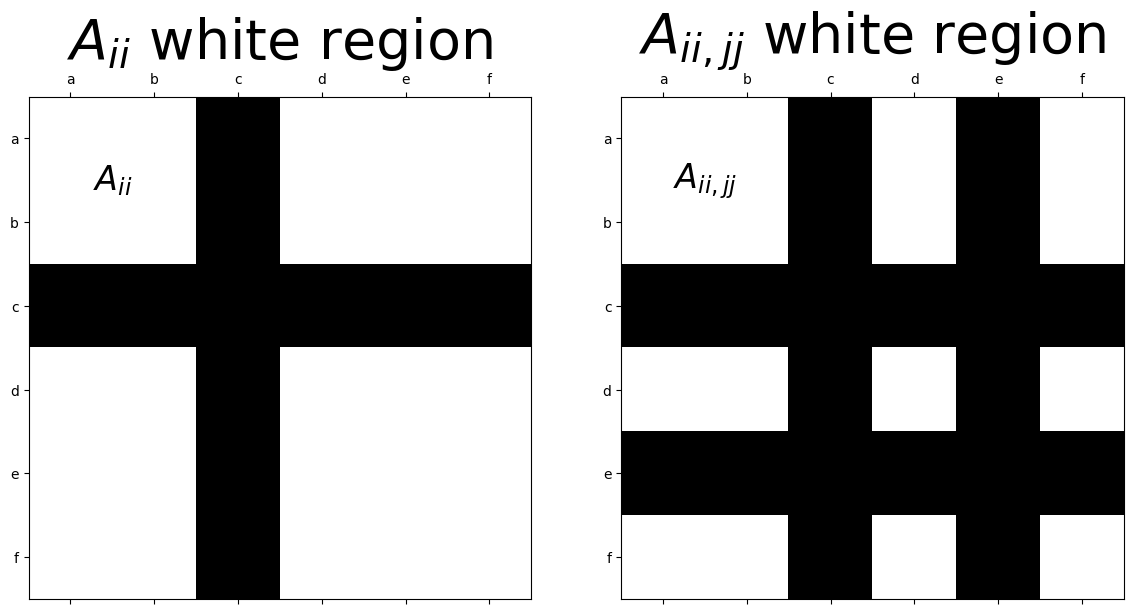

In [22]:
import matplotlib.pyplot as plt

# Define the matrix size (n x n)
n = 6

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create an empty matrix of size n x n
empty_matrix = [[1 for _ in range(n)] for _ in range(n)]
empty_matrix2 = [[1 for _ in range(n)] for _ in range(n)]

# Row and column to remove for A_ii
row_to_remove_ii = 2
col_to_remove_ii = 2

# Row and column to remove for A_ii,jj
row_to_remove_ii_jj = 4
col_to_remove_ii_jj = 4

# Set elements to 0 for A_ii
for i in range(n):
    for j in range(n):
        if i == row_to_remove_ii or j == col_to_remove_ii:
            empty_matrix[i][j] = 0

# Set elements to 0 for A_ii,jj
for i in range(n):
    for j in range(n):
        if i == row_to_remove_ii_jj or j == col_to_remove_ii_jj\
        or row_to_remove_ii == i or col_to_remove_ii == j:
            empty_matrix2[i][j] = 0

# Display A_ii
axs[0].matshow(empty_matrix, cmap='gray')
axs[0].set_xticks(range(n))
axs[0].set_yticks(range(n))
axs[0].set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f'])
axs[0].set_yticklabels(['a', 'b', 'c', 'd', 'e', 'f'])
axs[0].text(0.5, 0.5, r"$A_{ii}$", fontsize=24, ha='center', va='center')
axs[0].set_title("$A_{ii}$ white region", fontsize=40)

# Display A_ii,jj
axs[1].matshow(empty_matrix2, cmap='gray')
axs[1].set_xticks(range(n))
axs[1].set_yticks(range(n))
axs[1].set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f'])
axs[1].set_yticklabels(['a', 'b', 'c', 'd', 'e', 'f'])
axs[1].text(0.5, 0.5, r"$A_{ii,jj}$", fontsize=24, ha='center', va='center')
axs[1].set_title("$A_{ii,jj}$ white region", fontsize=40)

plt.tight_layout()
plt.show()


$\textbf{LEMMA 3.}$ Let $A$ be an $n \times n$ skew-symmetric matrix of even dimension, with entries in a field $F$. For $1 \leq i, j \leq n$, $i \neq j$, if $|A_{ij}| \neq 0$, then $|A_{ii,jj}| \neq 0$.


$\textbf{PERFECT MATCHING ALGORITHM.}$
The algorithm consists of two phases. In the first phase, a random substitution $S$ is chosen for $A$, as in Theorem 1. With high probability, this will be a good substitution for $A$. If so, the second phase will succeed in finding a perfect matching in $G$. This phase consists of $n/2$ iterations; in each iteration, one edge of the matching is found.

In the first iteration, $A^S$ is inverted, and an edge $(u_i, u_j)$ is found as described in Lemma 4. Since $|A_{ii,jj}| \neq 0 \pmod{p}$, $S$ is also a good substitution for the Tutte matrix $A_{ii,jj}$ of the graph $G_i$ induced on $V - \{u_i, u_j\}$.

Now, by inverting $A_{ii,jj}$, an edge is chosen from $G_i$, and so on. The union of edges so chosen forms a perfect matching in $G$.


In [23]:
from scipy import linalg
Aij = matBackup.copy().tocoo()
denseAdj = matBackup.copy().todense()
invMat = sps.linalg.inv(matBackup)
denseInv = invMat.copy().todense()
w = linalg.det(denseInv)
matchingGaussian = []
# Let A be an nxn matrix
# Denote by Aij the (n-1)x(n-1) submatrix obtained by removing the ith row and jth column
# Denote by Aii,jj the (n-2)x(n-2) submatrix obtained by removing the ith row and column
# and jth row and column
# Simply zeroing out rows/columns not in the submatrix won't work because
# 3.5.1 Matrices with rows or columns of zeroes are not invertible
# https://www.ucl.ac.uk/~ucahmto/0005_2021/Ch3.S5.html
rowlabels = [i for i in range(mat.shape[0] + 1)]
collabels = [i for i in range(mat.shape[1] + 1)]
# n/2 iterations
for r in range (mat.shape[0]//2):
    #print(r)
    # Simplify finding a column in the first row.
    for c in range (denseAdj.shape[1]):
        if (denseAdj[0,c]!=0.0 and denseInv[c,0]!=0.0):
            #print("Found edge", (rowlabels[0],collabels[c]))
            newAdj = denseAdj.copy()
            matchingGaussian.append((rowlabels[0],collabels[c]))
            # Define a mask for rows and columns to exclude
            rows_to_exclude = [0,c]
            cols_to_exclude = [c,0]
            # Create a boolean mask for rows and columns to keep
            rows_to_keep = np.ones(newAdj.shape[0], dtype=bool)
            cols_to_keep = np.ones(newAdj.shape[1], dtype=bool)
            rows_to_keep[rows_to_exclude] = False
            cols_to_keep[cols_to_exclude] = False
            
            # Apply the mask to the matrix
            denseAdj = newAdj[rows_to_keep][:, cols_to_keep]
            if (denseAdj.shape[0]>0):
                denseInv = scipy.linalg.inv(denseAdj)
                #print(denseAdj.shape)
                rowlabels.pop(c)
                rowlabels = rowlabels[1:]  # This creates a new list without the first element
                collabels.pop(c)
                collabels = collabels[1:]  # This creates a new list without the first element
                break

assert(len(reference_matching)==len(matchingGaussian))

NameError: name 'matBackup' is not defined

In [ ]:
# Draw the graph with the perfect matching edges highlighted
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Get the nodes in each partition
partition1_nodes, partition2_nodes = bipartite.sets(G)
# Use bipartite_layout for bipartite graph visualization
pos = nx.bipartite_layout(G, partition1_nodes)

matching_graph = nx.Graph()
matching_graph.add_edges_from(reference_matching)

# Create a new graph with only the matching edges
#matching_gaussian_edges = [(u, v) for u, v in G.edges() if (u, v) in matching or (v, u) in matching]
matching_gaussian_edges = nx.Graph()
matching_gaussian_edges.add_edges_from(matchingGaussian)

# Draw the bipartite graph with matching edges highlighted in red
#nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=2.0)
nx.draw(matching_graph, pos, with_labels=False, edge_color='r', width=2.0)
nx.draw(matching_gaussian_edges, pos, with_labels=False, edge_color='g', width=2.0)

plt.title("Bipartite Graph with Matching Edges Highlighted")
plt.show()


In [ ]:
import scipy.sparse as sps
from scipy.sparse import triu, tril
from scipy import linalg
def GaussMatching(G):
    # Convert the graph to a SciPy sparse matrix
    mat = nx.to_scipy_sparse_array(G,format="lil")
    #mat.setdiag(1)
    # Set diagonal to 1 so matrix is invertible
    # Extract upper triangle of symmetric sparse matrix
    upper_triangle = triu(mat,format="csc", k=1)
    lower_triangle = tril(mat,format="csc")
    mat=lower_triangle+(upper_triangle*-1)
    mat.data = np.random.randint(1, mat.nnz + 1, size=mat.nnz)

    Aij = mat.copy().tocoo()
    denseAdj = mat.copy().todense()
    invMat = sps.linalg.inv(mat)
    denseInv = invMat.copy().todense()
    w = linalg.det(denseInv)
    matchingGaussian = []
    # Let A be an nxn matrix
    # Denote by Aij the (n-1)x(n-1) submatrix obtained by removing the ith row and jth column
    # Denote by Aii,jj the (n-2)x(n-2) submatrix obtained by removing the ith row and column
    # and jth row and column
    # Simply zeroing out rows/columns not in the submatrix won't work because
    # 3.5.1 Matrices with rows or columns of zeroes are not invertible
    # https://www.ucl.ac.uk/~ucahmto/0005_2021/Ch3.S5.html
    rowlabels = [i for i in range(mat.shape[0] + 1)]
    collabels = [i for i in range(mat.shape[1] + 1)]
    # n/2 iterations
    for r in range (mat.shape[0]//2):
        #print(r)
        # Simplify finding a column in the first row.
        for c in range (denseAdj.shape[1]):
            if (denseAdj[0,c]!=0.0 and denseInv[c,0]!=0.0):
                #print("Found edge", (rowlabels[0],collabels[c]))
                newAdj = denseAdj.copy()
                matchingGaussian.append((rowlabels[0],collabels[c]))
                # Define a mask for rows and columns to exclude
                rows_to_exclude = [0,c]
                cols_to_exclude = [c,0]
                # Create a boolean mask for rows and columns to keep
                rows_to_keep = np.ones(newAdj.shape[0], dtype=bool)
                cols_to_keep = np.ones(newAdj.shape[1], dtype=bool)
                rows_to_keep[rows_to_exclude] = False
                cols_to_keep[cols_to_exclude] = False

                # Apply the mask to the matrix
                denseAdj = newAdj[rows_to_keep][:, cols_to_keep]
                if (denseAdj.shape[0]>0):
                    denseInv = scipy.linalg.inv(denseAdj)
                    #print(denseAdj.shape)
                    rowlabels.pop(c)
                    rowlabels = rowlabels[1:]  # This creates a new list without the first element
                    collabels.pop(c)
                    collabels = collabels[1:]  # This creates a new list without the first element
                    break
    return(matchingGaussian)

**THEOREM (Lovász)**: Let $A$ be the Tutte matrix of graph $G$, and let $m$ be the size of a maximum matching in $G$. Then, $\text{rank}$(A) = 2m.

$\textbf{THEOREM 1.}$ There is an $O(M(n) \log^2 n)$ randomized (Monte Carlo) algorithm for computing the size of a maximum matching in a graph $G(V, E)$.


Aside:  The algorithm is to randomize the adjacency matrix, check invertibility, and check rank.

In [ ]:
from sympy import nextprime
import scipy.sparse as sps
from scipy.sparse import triu, tril
from scipy import linalg
from scipy.sparse.csgraph import structural_rank
def PerfectMatchingSize(G):
    # Convert the graph to a SciPy sparse matrix
    mat = nx.to_scipy_sparse_array(G,format="lil")
    #mat.setdiag(1)
    # Set diagonal to 1 so matrix is invertible
    # Extract upper triangle of symmetric sparse matrix
    upper_triangle = triu(mat,format="csc", k=1)
    lower_triangle = tril(mat,format="csc")
    mat=lower_triangle+(upper_triangle*-1)
    n = mat.shape[0]
    next_prime = nextprime(n**4)
    mat.data = np.random.randint(1, next_prime, size=mat.nnz)
    
    try:
        invMat = sps.linalg.inv(mat)
        lu = scipy.sparse.linalg.splu(invMat)
        diagL = lu.L.diagonal()
        diagU = lu.U.diagonal()
        L,U = lu.L, lu.U
        d = diagL.prod()*diagU.prod()
        #print("sparse det",d)
        invertible=True
    except Exception:
        invertible=False
        d = 0.0

    if (d !=- 0.0 ):
        r = structural_rank(mat)
        return(r//2)
    else:
        raise CustomError("Perfect matching doesn't exist.")

In [ ]:
import networkx as nx

def MaxCardinalityMatchingSize(G):
    # Number of original vertices (n)
    n = len(G.nodes)
    # Number of original edges (2m)
    m = len(G.edges)
    # Number of new vertices to add (n - 2m)
    num_new_vertices = n - 2 * m

    # Create a copy of the original graph G
    G_prime = G.copy()

    # Add new vertices to G'
    new_vertices = range(n, n + num_new_vertices)
    G_prime.add_nodes_from(new_vertices)

    # Create edges between each new vertex and each original vertex
    for new_vertex in new_vertices:
        for original_vertex in G.nodes:
            G_prime.add_edge(new_vertex, original_vertex)

    return PerfectMatchingSize(G_prime)


In [ ]:
print(PerfectMatchingSize(G))
print(MaxCardinalityMatchingSize(G))

In [ ]:
# Draw the graph with the perfect matching edges highlighted
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
def PlotMatching(G,Edmonds,Gauss):
    # Get the nodes in each partition
    partition1_nodes, partition2_nodes = bipartite.sets(G)
    # Use bipartite_layout for bipartite graph visualization
    pos = nx.bipartite_layout(G, partition1_nodes)

    matching_graph = nx.Graph()
    matching_graph.add_edges_from(Edmonds)

    # Create a new graph with only the matching edges
    #matching_gaussian_edges = [(u, v) for u, v in G.edges() if (u, v) in matching or (v, u) in matching]
    matching_gaussian_edges = nx.Graph()
    matching_gaussian_edges.add_edges_from(Gauss)

    # Draw the bipartite graph with matching edges highlighted in red
    #nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=2.0)
    # Draw the isolated nodes as well
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes)

    nx.draw(matching_graph, pos, with_labels=True, edge_color='r', width=2.0)

    plt.title("Bipartite Graph with Edmonds Edges Highlighted")
    plt.show()
    plt.title("Bipartite Graph with Gauss Edges Highlighted")
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes)
    nx.draw(matching_gaussian_edges, pos, with_labels=True, edge_color='g', width=2.0)
    plt.show()


In [ ]:
def has_duplicate_values(pairs):
    seen_values = set()
    
    for pair in pairs:
        for value in pair:
            if value in seen_values:
                return True
            seen_values.add(value)
    
    return False

In [ ]:
from networkx.algorithms import bipartite
import networkx as nx
import timeit
import time
# Wrap the code in a loop to increase n by powers of 10
for exponent in range(1, 4):  # Increase n by powers of 10 (1 to 4)
    n = 10 ** exponent
    m = n
    p = 0.6
    seed = 1
    directed = False
    
    # Generate a random graph
    # Record the start time
    start_time = time.time()
    G = nx.bipartite.random_graph(n, m, p, seed, directed)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Generated Bipartite Graph in {elapsed_time} seconds")
    # Convert the graph to a SciPy sparse matrix
    start_time = time.time()
    
    start_time = time.time()
    Edmonds = nx.max_weight_matching(G, maxcardinality=True)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Generated reference matching in {elapsed_time} seconds")
    start_time = time.time()
    assert (len(Edmonds)==n)

    mat = nx.to_scipy_sparse_array(G, format="csc")
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Convert the graph to a SciPy sparse matrix in {elapsed_time} seconds")
    # Wrap the gaussmatching method in a timeit function to get average time
    def time_Gauss():
        return GaussMatching(G)
    def time_Edmonds():
        return nx.max_weight_matching(G, maxcardinality=True)
    Gauss = GaussMatching(G)
    PlotMatching(G,Edmonds,Gauss)
    assert(len(Gauss)==len(Edmonds))
    assert(not has_duplicate_values(Edmonds))
    assert(not has_duplicate_values(Gauss))
    numSamples = 1
    execution_timeGauss = timeit.timeit(time_Gauss, number=numSamples) / numSamples  # 100 runs for averaging
    execution_timeEdmonds = timeit.timeit(time_Edmonds, number=numSamples) / numSamples  # 100 runs for averaging
    print(f"n={n}, Average Gauss Execution Time: {execution_timeGauss} seconds")
    print(f"n={n}, Valid Matching Gauss: {not has_duplicate_values(Gauss)}")
    print(f"n={n}, Length Matching Gauss: {len(Gauss)}")

    #print(f"n={n}, Average GaussDOK Execution Time: {execution_timeGaussDOK} seconds")
    print(f"n={n}, Average Edmonds Execution Time: {execution_timeEdmonds} seconds")
    print(f"n={n}, Valid Matching Edmonds: {not has_duplicate_values(Edmonds)}")
    print(f"n={n}, Length Matching Edmonds: {len(Edmonds)}")
